**Data Extraction**
:Parsing the XML data to CSV

In [ ]:
import xml.etree.ElementTree as ET
# Directory to XML file
x = ET.parse("/content/drive/MyDrive/parse/3_ADR22Q1.xml") 
root = x.getroot()
sfs=root.findall('safetyreport')
print(len(sfs))

In [ ]:
Data=[]
for sf in sfs[:]:
        patient_info=[]
        try:
          patient_info.append(sf.find('occurcountry').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('serious').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('seriousnessdeath').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('seriousnesslifethreatening').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('seriousnesshospitalization').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('seriousnessdisabling').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('seriousnesscongenitalanomali').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('patient').find('patientonsetage').text)
        except:
            patient_info.append('nan')
        try:
            patient_info.append(sf.find('patient').find('patientsex').text)
        except:
            patient_info.append('nan')
     
        reactions= sf.find('patient').findall('reaction')
        reaction_string=""
        for reaction in reactions:
            rx=reaction.find('reactionmeddrapt').text
            reaction_string=reaction_string + ',' + rx

        try:
            patient_info.append(reaction_string)
        except:
            patient_info.append('nan')

        drugs=sf.find('patient').findall('drug')

        med_string=""
        med_dosage=""
        med_indication=""
        med_startdate=""
        med_enddate=""
        med_dosageform=""
        med_admnroute=""

        for drug in drugs:
            try:
               dosage_form=drug.find('drugdosageform').text
            except:
               dosage_form='nan' 
            try:
                start_date=drug.find('drugstartdate').text
            except:
               start_date='nan'
            try: 
                end_date= drug.find('drugenddate').text
            except:
                end_date='nan'
            try:
                admn_route=drug.find('drugadministrationroute').text
            except:
                admn_route='nan'
            try:
                med=drug.find('medicinalproduct').text
            except:
                med='nan'
            try:
                dosage= drug.find('drugdosagetext').text
            except:
                dosage='nan'
            try:
                indication= drug.find('drugindication').text
            except:
                indication='nan'

            med_startdate=med_startdate + ',' + start_date
            med_enddate=med_enddate+ ',' + end_date
            med_admnroute=med_admnroute + ','+ admn_route
            med_dosageform=med_dosageform + ',' + dosage_form
            med_string=med_string + ','  + med
            med_dosage=med_dosage+ ',' + dosage
            med_indication= med_indication+ ',' + indication

        
        patient_info.append(med_string)
        patient_info.append(med_dosage)
        patient_info.append(med_indication)
        patient_info.append(med_startdate)
        patient_info.append(med_enddate)
        patient_info.append(med_dosageform)
        patient_info.append(med_admnroute)
        Data.append(patient_info)
#Save extracted data to csv        
import pandas as pd
df=pd.DataFrame(Data)
df.to_csv('2_ADR22Q1_80000_100000.csv', sep=',', index=False)

In [ ]:
#Read the parsed csv to pandas dataframe
df=pd.read_csv('/content/2_ADR22Q1_80000_100000.csv')
df.shape

(166281, 17)

In [ ]:
#Extract and save patients with rheumatoid_athritis to another CSV for downstream analysis
df['12']=df['12'].str.lower()
df_rheumatoid_athritis=df[df['12']==',rheumatoid arthritis']
df_rheumatoid_athritis.to_csv('df_rheumatoid_athritis4.csv', sep=',', index=False)

# **Data Cleaning**
**Steps to Cleaning the dataset**


1.   Extract information of people who suffers the following adverse effects:Pain, Headache, Nausea, Vomiting, Rash, Pneumonia, Swelling and Infection. 
2. Extracting the needed columns namely Country,Age,Gender,Drug Name, Drug Form Drug Route of Administration and Reactions from the output of step 1 above.
3. Cleaning the Columns with badly formatted names.
4.One Hot Encode the Target/Reaction Column
5. Fill all missng Values as -9999
6.Label encode the other Categorical Columns: Country, Drug Name, Drug Form Drug Route of Administration




In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Rh/Uncleaned_Data.csv')

Step 1:Extract information of people who suffers the following adverse effects:Pain, Headache, Nausea, Vomiting, Rash, Pneumonia, Swelling and Infection.

In [ ]:
df['9']=df['9'].str.lower()
df_pain=df[(df['9'].str.contains('pain')) | (df['9'].str.contains('arthralgia')) ]
df_swelling= df[df['9'].str.contains('swelling')]
df_vomiting= df[df['9'].str.contains('vomiting')]
df_headache= df[df['9'].str.contains('headache')]
df_infection= df[df['9'].str.contains('infection')]
df_pneumonia= df[df['9'].str.contains('pneumonia')]
df_rash= df[df['9'].str.contains('rash')]
df_nausea= df[df['9'].str.contains('nausea')]
df_death= df[df['9'].str.contains('death')]

In [ ]:
df_headache['reaction']='headache'
df_pain['reaction']='pain'
df_swelling['reaction']='swelling'
df_vomiting['reaction']='vomiting'
df_pneumonia['reaction']='pneumonia'
df_death['reaction']='death'
df_rash['reaction']='rash'
df_nausea['reaction']='nausea'
df_infection['reaction']='infection'

In [ ]:
df_rx=pd.concat([df_headache,df_pain,df_swelling, df_vomiting, df_pneumonia, df_death,df_rash, df_nausea, df_infection ])

In [ ]:
df_rx=df_rx.drop_duplicates().reset_index(drop=True)

In [ ]:
df_rx.shape

(32758, 18)

Step 2: Extracting the needed columns namely Country,Age,Gender,Drug Name, Drug Form Drug Route of Administration and Reactions from the output of step 1 above.

In [ ]:
df_rx=df_rx [['0','7', '8', '10', '15', '16', 'reaction' ]]
df_rx=df_rx.reset_index().drop('index', axis=1)
df_rx['16']= df_rx['16'].str[1:]
df_rx['10']= df_rx['10'].str[1:]
df_rx['15']= df_rx['15'].str[1:]

In [ ]:
# rename nan as NAN
import numpy as np
df_rx.replace('nan', np.nan, inplace=True)

Step 3: Cleaning the Columns with badly formatted names.

In [ ]:
df_rx['15']=df_rx['15'].str.lower()
df_rx['15'].replace('solution for injection in pre-filled syringe', 'injection', inplace=True)
df_rx['15'].replace('solution for injection', 'injection', inplace=True)
df_rx['15'].replace('solution for injection in pre-filled pen', 'injection', inplace=True)
df_rx['15'].replace('solution for infusion', 'infusion', inplace=True)
df_rx['15'].replace('infusion, solution', 'infusion', inplace=True)
df_rx['15'].replace('pre-filled syringe', 'injection', inplace=True)
df_rx['15'].replace('prolonged-release tablet', 'prolonged-release tablet', inplace=True)
df_rx['15'].replace('capsule, hard', 'Tablet', inplace=True)
df_rx['15'].replace('coated tablet', 'Tablet', inplace=True)
df_rx['15'].replace('concentrate for solution for infusion', 'infusion', inplace=True)
df_rx['15'].replace('powder for solution for infusion', 'infusion', inplace=True)
df_rx['15'].replace('infusion', 'infusion', inplace=True)
df_rx['15'].replace('powder and solvent for solution for injection', 'injection', inplace=True)
df_rx['15'].replace('unknown formulation', np.nan, inplace=True)
df_rx['15'].replace('unknown', np.nan, inplace=True)
df_rx['15'].replace('extended release', 'extended release', inplace=True)
df_rx['15'].replace('extended released', 'extended release', inplace=True)
df_rx['15'].replace('extended release', 'extended release', inplace=True)
df_rx['15'].replace('suspension for injection in pre-filled pen', 'injection', inplace=True)
df_rx['15'].replace('film-coated tablet', 'Tablet', inplace=True)
df_rx['15'].replace('capsule', 'Tablet', inplace=True)
df_rx['15'].replace('pen', 'injection', inplace=True)
df_rx['15'].replace('tablets', 'Tablet', inplace=True)
df_rx['15'].replace('er', 'extended release', inplace=True)
df_rx['15'].replace('powder for injection', 'injection', inplace=True)
df_rx['15'].replace('modified-release tablet', 'Tablet', inplace=True)
df_rx['15'].replace('tablet', 'Tablet', inplace=True)
df_rx['15'].replace('solution for infusion in pre-filled syringe', 'infusion', inplace=True)
df_rx['15'].replace('injection', 'injection', inplace=True)
df_rx['15'].replace('suspension for injection', 'injection', inplace=True)
df_rx['15'].replace('injection for subcutaneous use', 'injection', inplace=True)
df_rx['15'].replace('soln for inject in pre-filled syringe', 'injection', inplace=True)
df_rx['15'].replace('unspecified', np.nan, inplace=True)
df_rx['15'].replace('scored tablet', 'Tablet', inplace=True)
df_rx['15'].replace('pill', 'Tablet', inplace=True)


In [ ]:
df=df_rx.copy()

In [ ]:
df['10'].replace('ACTEMRA ACTPEN','ACTEMRA', inplace=True)
df['10'].replace('ADALIMUMAB (ADALIMUMAB 40MG/0.8ML INJ, SYRINGE, KIT)','ADALIMUMAB', inplace=True)
df['10'].replace('ADALIMUMAB (ADALIMUMAB 40MG/0.8ML INJ,PEN,KIT)','ADALIMUMAB', inplace=True)
df['10'].replace('BARICITINIB 2MG','BARICITINIB', inplace=True)
df['10'].replace('BARICITINIB.','BARICITINIB', inplace=True)
df['10'].replace('CELECOXIB.','CELECOXIB', inplace=True)
df['10'].replace('CERTOLIZUMAB PEGOL AUTOCLICKS','CERTOLIZUMAB PEGOL', inplace=True)
df['10'].replace('CERTOLIZUMAB PEGOL RA', 'CERTOLIZUMAB PEGOL', inplace=True)
df['10'].replace('CERTOLIZUMAB PEGOL RA AUTOCLICKS','CERTOLIZUMAB PEGOL', inplace=True)
df['10'].replace('CERTOLIZUMAB PEGOL RA AVA','CERTOLIZUMAB PEGOL', inplace=True)
df['10'].replace('DRUG, UNSPECIFIED',np.nan, inplace=True)
df['10'].replace('ERELZI (ETANERCEPT)','ERELZI', inplace=True)
df['10'].replace('GABAPENTIN.','GABAPENTIN CAPSULES', inplace=True)
df['10'].replace('GOLIMUMAB SOLUTION FOR INJECTION','GOLIMUMAB', inplace=True)
df['10'].replace('HYDROXYCHLOROQUINE 200MG','HYDROXYCHLOROQUINE', inplace=True)
df['10'].replace('GOLIMUMAB SOLUTION FOR INJECTION IN PRE-FILLED PEN','GOLIMUMAB', inplace=True)
df['10'].replace('HYDROXYCHLOROQUINE 200MG TAB, 200MG','HYDROXYCHLOROQUINE', inplace=True)
df['10'].replace('HYDROXYCHLOROQUINE SULFATE','HYDROXYCHLOROQUINE', inplace=True)
df['10'].replace('HYDROXYCHLOROQUINE SULFATE (AUTHORIZED GENERIC),PLAQUENIL','HYDROXYCHLOROQUINE', inplace=True)
df['10'].replace('HYDROXYCHLOROQUINE SULFATE.','HYDROXYCHLOROQUINE', inplace=True)
df['10'].replace('INFLIXIMAB, RECOMBINANT','INFLIXIMAB', inplace=True)
df['10'].replace('INFLIXIMAB-DYYB (INFLIXIMAB-DYYB 100MG/VIL INJ,LYPHL)','INFLIXIMAB', inplace=True)
df['10'].replace('LEFLUNOMIDE.','LEFLUNOMIDE', inplace=True)
df['10'].replace('LYRICA CR','LYRICA', inplace=True)
df['10']=df['10'].str.replace(r'(^.*METHOTREXAT.*$)', 'METHOTREXATE', regex=True)
df['10']=df['10'].str.replace(r'(^.METHOTREXATE.*$)', 'METHOTREXATE', regex=True)
df['10'].replace('MYCOPHENOLATE 500MG ACCORD HEALTHCARE', 'MYCOPHENOLATE', inplace=True)
df['10'].replace('MYCOPHENOLATE MOFETIL.', 'MYCOPHENOLATE', inplace=True)
df['10'].replace('PREDNISONE (PREDNISONE 10MG TAB)', 'PREDNISONE', inplace=True)
df['10'].replace('PREDNISONE (PREDNISONE 5MG TAB)', 'PREDNISONE', inplace=True)
df['10'].replace('PREDNISONE.', 'PREDNISONE', inplace=True)
df['10'].replace('RITUXIMAB (UNKNOWN)', 'RITUXIMAB', inplace=True)
df['10'].replace('RITUXIMAB.', 'RITUXIMAB', inplace=True)
df['10'].replace('RITUXIMAB-PVVR', 'RITUXIMAB', inplace=True)
df['10'].replace('SALAZOPYRIN EN','SALAZOPYRIN', inplace=True)
df['10'].replace('SALAZOPYRIN EN-TABS','SALAZOPYRIN', inplace=True)
df['10'].replace('SIMPONI ARIA', 'SIMPONI', inplace=True)
df['10'].replace('SULFASALAZINE / BRAND NAME NOT SPECIFIED','SULFASALAZINE', inplace=True)
df['10'].replace('SULFASALAZINE.','SULFASALAZINE', inplace=True)
df['10'].replace('TOCILIZUMAB.', 'TOCILIZUMAB', inplace=True)
df['10'].replace('TOFACITINIB CITRATE', 'TOFACITINIB', inplace=True)
df['10'].replace('UPADACITINIB (UPADACITINIB 15MG 24HR TAB,SA)', 'UPADACITINIB', inplace=True)
df['10'].replace('VOLTAREN ARTHRITIS PAIN', 'VOLTAREN', inplace=True)
df['10'].replace( 'XELJANZ XR', 'XELJANZ', inplace=True)
 

In [ ]:
df_rx=df.copy()

Step 4: One Hot Encode the Target/Reaction Column

In [ ]:
dummies=pd.get_dummies(df_rx['reaction'])
df_rx=pd.concat([df_rx, dummies], axis=1)
df_rx=df_rx.drop_duplicates()
df_rx.drop('reaction', axis=1, inplace=True)

Step 5: Fill all missng Values as -9999

In [ ]:
df_rx.fillna(-9999, inplace=True)

Step 6: Label encode the other Categorical Columns: Country, Drug Name, Drug Form Drug Route of Administration

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
import pickle

df_rx['0']=le.fit_transform(df_rx['0'].astype(str))
output = open('Country.pkl', 'wb') # Save label encoder as a Pickled file for latter use
pickle.dump(le, output)
output.close()

df_rx['10']=le.fit_transform(df_rx['10'].astype(str))
output = open('Drug.pkl', 'wb')  # Save label encoder as a Pickled file for latter use
pickle.dump(le, output)
output.close()

df_rx['15']=le.fit_transform(df_rx['15'].astype(str))
output = open('Drug_Form.pkl', 'wb')  # Save label encoder as a Pickled file for latter use
pickle.dump(le, output)
output.close()

df_rx['16']= le.fit_transform(df_rx['16'].astype(str))
output = open('Route_of _Administration.pkl', 'wb') # Save label encoder as a Pickled file for latter use
pickle.dump(le, output)
output.close()

# **Building the Machine Learning Model**

In [ ]:
#Install catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
#Independent Variables
X=df_rx[['0', '7', '8', '10', '15', '16']]

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
model_scores={}

# Build a model for each of the eight adverse effect and return a dictionary of each model and respective performance on the test dataset
for i in ['infection','pain', 'swelling', 'vomiting', 'headache', 'rash', 'nausea', 'pneumonia']:
  Y=df_rx[i]
  X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42) #Split Dataset to train and test 
  model=CatBoostClassifier(verbose=0)
  model.fit(X_train, y_train)
  Accuracy=model.score(X_test, y_test)
  Recall= recall_score(y_test, model.predict(X_test))
  sc=[Accuracy,Recall]
  model_scores[i]=sc
print(model_scores)

{'infection': [0.7944664031620553, 0.08972691807542263], 'pain': [0.7333333333333333, 0.01818181818181818], 'swelling': [0.8843214756258234, 0.0023148148148148147], 'vomiting': [0.9633728590250329, 0.0], 'headache': [0.9343873517786562, 0.0], 'rash': [0.9433465085638999, 0.0], 'nausea': [0.9552042160737813, 0.0], 'pneumonia': [0.9014492753623189, 0.00821917808219178]}


In [ ]:
scores=pd.DataFrame(model_scores).T
scores.rename(columns={0:'Accuracy', 1:'Recall'}, inplace=True)

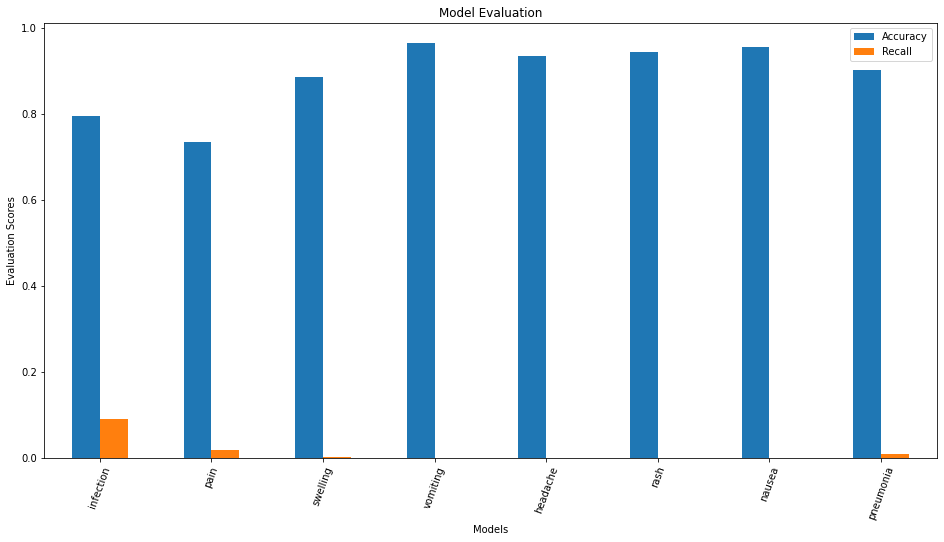

In [ ]:
import matplotlib.pyplot as plt

scores.plot(kind='bar', figsize=(16,8))
plt.title('Model Evaluation')
plt.ylabel('Evaluation Scores')
plt.xlabel('Models')
plt.xticks(rotation=70)
plt.savefig('Model_eval.jpg')

Building Final Model

In [ ]:
from catboost import CatBoostClassifier
for i in ['infection','pain', 'swelling', 'vomiting', 'headache', 'rash', 'nausea', 'pneumonia']:
  X=df_rx[['0', '7', '8', '10', '15', '16']]
  Y=df_rx[i]
  model= CatBoostClassifier(verbose=0)
  model.fit(X, Y)
  model.save_model(i) # Saving the model for Future use.
